<a href="https://colab.research.google.com/github/RafsanJany-44/ARC_DEEP/blob/main/Neural_Network_from_scratch_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#All function

In [2]:
def sigmoid(z):
    return 1 / (1+np.exp(-z))



def sigmoid_derivative(z):
    return np.exp(-z)/((1+np.exp(-z))**2)


def forward_prop(x,Wxh,Why):
    z1 = np.dot(x,Wxh) + bh
    a1 = sigmoid(z1)
    z2 = np.dot(a1,Why) + by
    y_hat = sigmoid(z2)

    return z1,a1,z2,y_hat


def backword_prop(y_hat, z1, a1, z2):
    delta2 = np.multiply(-(y-y_hat),sigmoid_derivative(z2))
    dJ_dWhy = np.dot(a1.T, delta2)
    delta1 = np.dot(delta2,Why.T)*sigmoid_derivative(z1)
    dJ_dWxh = np.dot(x.T, delta1)

    return dJ_dWxh, dJ_dWhy

def cost_function(y, y_hat):
    J = 0.5*sum((y-y_hat)**2)
    return J




def dot_product_breakdown(matrix_a, matrix_b):
    # Check if matrices are compatible for dot product
    if matrix_a.shape[1] != matrix_b.shape[0]:
        print("Error: Incompatible matrices for dot product.")
        return

    # Calculate the dot product
    result = np.dot(matrix_a, matrix_b)

    # Print the detailed breakdown in the console
    print("Detailed Breakdown of Dot Product:")
    print("===================================")
    print(" Element   |   Calculation                    |   Result")
    print("------------|----------------------------------|------------------")

    # Iterate through each element in the resulting matrix
    for k in range(result.shape[1]):
      for i in range(result.shape[0]):
          calculation = " + ".join([f"({matrix_a[i, j]} * {matrix_b[j, k]})" for j in range(matrix_a.shape[1])])
          print(f" Result[{i + 1},1] |   {calculation}   |   {result[i, k]}")

    print("===================================")

# Requirements

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Design

Putting all the concepts we have learned so far, we will see how to build a neural network
from scratch. We will learn how the neural network learns to perform the XOR gate
operation. The XOR gate returns 1 only when exactly only one of its inputs is 1 else it returns 0 as shown in
the following figure:

![image](https://github.com/PacktPublishing/Hands-On-Deep-Learning-Algorithms-with-Python/blob/master/Chapter01/images/1.png?raw=1)


To perform the XOR gate operation, we build a simple two-layer neural network as shown
in the following figure. As you can observe, we have an input layer with two nodes, a
hidden layer with five nodes and an output layers which consist of 1 node:


![image](https://github.com/PacktPublishing/Hands-On-Deep-Learning-Algorithms-with-Python/blob/master/Chapter01/images/2.png?raw=1)


#Define dataset

In [3]:
#x = np.array([ [0], [1], [1],[0]])


x = np.array([ [0,1], [1,0], [1,1],[0,0]])
y = np.array([ [1], [1], [0], [0]])

#Define the number of nodes in each layer:

In [4]:
num_input_nuron = x.shape[1]
num_hidden_neuron = 5
num_output_neuron = 1

#Initialize weights and bias randomly. First, we initialize, input to hidden layer weights:

In [5]:
Wxh = np.random.randn(num_input_nuron,num_hidden_neuron)
bh = np.zeros((1,num_hidden_neuron))

In [6]:
Wxh,bh

(array([[ 0.11504582,  0.21389847, -1.10702661, -0.58049586,  0.29216823],
        [ 0.22818819,  0.40889456, -0.14985501, -0.65731402,  1.56974901]]),
 array([[0., 0., 0., 0., 0.]]))

#Now initialize, hidden to output layer weights:

In [7]:
Why = np.random.randn (num_input_nuron,num_hidden_neuron)
by = np.zeros((1,num_output_neuron))

In [8]:
Why, by

(array([[ 0.3969645 ],
        [ 0.9729442 ],
        [ 0.07122377],
        [ 1.51936219],
        [-0.56504529]]),
 array([[0.]]))

#Set the learning rate and number of training iterations:

In [9]:
alpha = 0.01
num_iterations = 5000

#Now let's start training the network:

In [10]:
%%capture
cost = []
for i in range(num_iterations):

    #perform forward propagation and predict output
    z1,a1,z2,y_hat = forward_prop(x,Wxh,Why)
    print("Iteration: ", i,"----------------------------------------------------------------------------------------------------------")

    print("#perform forward propagation and predict output: ")
    print("z1 = ",z1)
    print("a1 = ",a1)
    print("z2 = ",z2)
    print("y_hat = ",y_hat)

    #perform backward propagation and calculate gradients
    dJ_dWxh, dJ_dWhy = backword_prop(y_hat, z1, a1, z2)
    print("#perform backward propagation and calculate gradients: ")
    print("dJ_dWxh = ",dJ_dWxh)
    print("dJ_dWhy = ",dJ_dWhy)


    #update the weights
    Wxh = Wxh -alpha * dJ_dWxh
    Why = Why -alpha * dJ_dWhy

    print("#update the weights: ")
    print("Wxh = ",Wxh)
    print("Why = ",Why)

    #compute cost
    c = cost_function(y, y_hat)
    print("#compute cost: ")
    print("cost = ",c)

    #store the cost
    cost.append(c)

Text(0, 0.5, 'Cost')

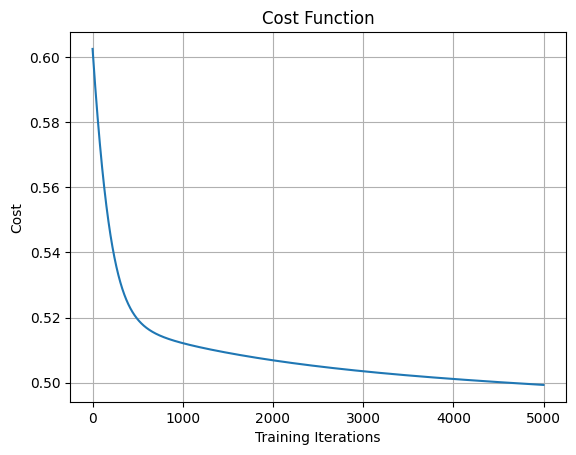

In [11]:
plt.grid()
plt.plot(range(num_iterations),cost)

plt.title('Cost Function')
plt.xlabel('Training Iterations')
plt.ylabel('Cost')

#details

In [3]:
x = np.array([ [0,1], [1,0], [1,1],[0,0]])
y = np.array([ [1], [1], [0], [0]])


num_input_neuron = x.shape[1]
num_hidden_neuron = 5
num_output_neuron = 1

In [4]:
Wxh = np.random.randn(num_input_neuron,num_hidden_neuron)
bh = np.zeros((1,num_hidden_neuron))

In [5]:
Why = np.random.randn (num_hidden_neuron,num_output_neuron)
by = np.zeros((1,num_output_neuron))

In [6]:
z1,a1,z2,y_hat = forward_prop(x,Wxh,Why)
dJ_dWxh, dJ_dWhy = backword_prop(y_hat, z1, a1, z2)

In [8]:
x,Wxh,Why

(array([[0, 1],
        [1, 0],
        [1, 1],
        [0, 0]]),
 array([[-0.47954065,  0.20615306,  1.23495644,  0.46804693, -0.49312533],
        [ 0.5611691 , -0.03092361, -1.99684944,  0.62336978,  0.73940902]]),
 array([[ 0.28341541],
        [-0.30764751],
        [-0.63190145],
        [ 1.29136923],
        [ 0.20140833]]))

In [9]:
 dot_product_breakdown(x, Wxh)

Detailed Breakdown of Dot Product:
 Element   |   Calculation                    |   Result
------------|----------------------------------|------------------
 Result[1,1] |   (0 * -0.4795406457863602) + (1 * 0.5611690971371517)   |   0.5611690971371517
 Result[2,1] |   (1 * -0.4795406457863602) + (0 * 0.5611690971371517)   |   -0.4795406457863602
 Result[3,1] |   (1 * -0.4795406457863602) + (1 * 0.5611690971371517)   |   0.0816284513507915
 Result[4,1] |   (0 * -0.4795406457863602) + (0 * 0.5611690971371517)   |   0.0
 Result[1,1] |   (0 * 0.20615305691793048) + (1 * -0.03092361364834478)   |   -0.03092361364834478
 Result[2,1] |   (1 * 0.20615305691793048) + (0 * -0.03092361364834478)   |   0.20615305691793048
 Result[3,1] |   (1 * 0.20615305691793048) + (1 * -0.03092361364834478)   |   0.1752294432695857
 Result[4,1] |   (0 * 0.20615305691793048) + (0 * -0.03092361364834478)   |   0.0
 Result[1,1] |   (0 * 1.2349564375341873) + (1 * -1.9968494355298494)   |   -1.9968494355298494
 Re

#More Versetile

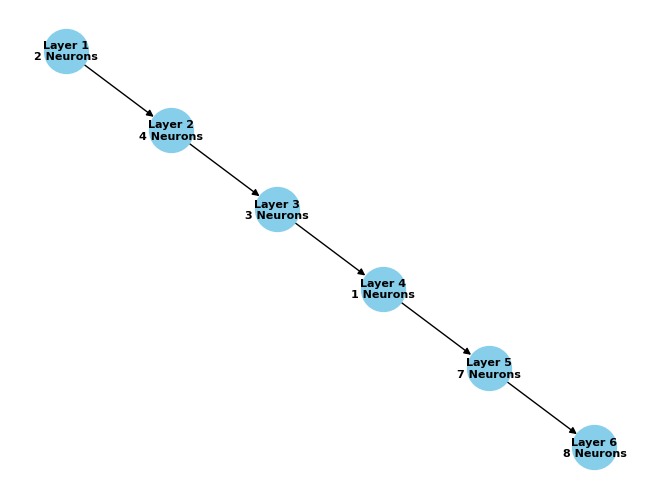

Epoch 1/100 completed
Epoch 2/100 completed
Epoch 3/100 completed
Epoch 4/100 completed
Epoch 5/100 completed
Epoch 6/100 completed
Epoch 7/100 completed
Epoch 8/100 completed
Epoch 9/100 completed
Epoch 10/100 completed
Epoch 11/100 completed
Epoch 12/100 completed
Epoch 13/100 completed
Epoch 14/100 completed
Epoch 15/100 completed
Epoch 16/100 completed
Epoch 17/100 completed
Epoch 18/100 completed
Epoch 19/100 completed
Epoch 20/100 completed
Epoch 21/100 completed
Epoch 22/100 completed
Epoch 23/100 completed
Epoch 24/100 completed
Epoch 25/100 completed
Epoch 26/100 completed
Epoch 27/100 completed
Epoch 28/100 completed
Epoch 29/100 completed
Epoch 30/100 completed
Epoch 31/100 completed
Epoch 32/100 completed
Epoch 33/100 completed
Epoch 34/100 completed
Epoch 35/100 completed
Epoch 36/100 completed
Epoch 37/100 completed
Epoch 38/100 completed
Epoch 39/100 completed
Epoch 40/100 completed
Epoch 41/100 completed
Epoch 42/100 completed
Epoch 43/100 completed
Epoch 44/100 complet

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

class NeuralNetwork:
    def __init__(self, layer_sizes):
        self.layer_sizes = layer_sizes
        self.num_layers = len(layer_sizes)
        self.weights = [np.random.randn(y, x) for x, y in zip(layer_sizes[:-1], layer_sizes[1:])]
        self.biases = [np.random.randn(y, 1) for y in layer_sizes[1:]]

    def sigmoid(self, z):
        return 1.0 / (1.0 + np.exp(-z))

    def sigmoid_derivative(self, z):
        return self.sigmoid(z) * (1 - self.sigmoid(z))

    def feedforward(self, inputs):
        activations = inputs
        for w, b in zip(self.weights, self.biases):
            activations = self.sigmoid(np.dot(w, activations) + b)
        return activations

    def train(self, training_data, epochs, learning_rate):
        for epoch in range(epochs):
            for x, y in training_data:
                self.update_weights_biases(x, y, learning_rate)
            print(f"Epoch {epoch + 1}/{epochs} completed")

    def update_weights_biases(self, x, y, learning_rate):
         # Forward pass
        activations = [x]
        zs = []

        for w, b in zip(self.weights, self.biases):
            z = np.dot(w, activations[-1]) + b
            zs.append(z)
            activations.append(self.sigmoid(z))

        # Backward pass
        delta = self.mean_squared_error_derivative(activations[-1], y) * self.sigmoid_derivative(zs[-1])
        nabla_b = [delta]
        nabla_w = [np.dot(delta, activations[-2].T)]

        for l in range(2, self.num_layers):
            z = zs[-l]
            sp = self.sigmoid_derivative(z)
            delta = np.dot(self.weights[-l + 1].T, delta) * sp
            nabla_b.insert(0, delta)
            nabla_w.insert(0, np.dot(delta, activations[-l - 1].T))

        # Update weights and biases
        self.weights = [w - (learning_rate / len(x)) * nw for w, nw in zip(self.weights, nabla_w)]
        self.biases = [b - (learning_rate / len(x)) * nb.sum(axis=1, keepdims=True) for b, nb in zip(self.biases, nabla_b)]


    def mean_squared_error_derivative(self, output_activations, y):
        return output_activations - y

    def visualize(self):
        G = nx.DiGraph()

        # Add nodes
        for i, size in enumerate(self.layer_sizes):
            G.add_node(f"Layer {i + 1}\n{size} Neurons", pos=(i, -i))

        # Add edges
        for i in range(len(self.layer_sizes) - 1):
            for j in range(self.layer_sizes[i]):
                for k in range(self.layer_sizes[i + 1]):
                    G.add_edge(f"Layer {i + 1}\n{self.layer_sizes[i]} Neurons", f"Layer {i + 2}\n{self.layer_sizes[i + 1]} Neurons")

        # Draw the neural network
        pos = nx.get_node_attributes(G, 'pos')
        nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=1000, node_color='skyblue', font_size=8, font_color='black')
        plt.show()

# Example usage:
if __name__ == "__main__":
    # Define the neural network architecture (number of neurons in each layer)
    layer_sizes = [2, 4, 3, 1,7,8]  # Example with 4 layers

    # Create a neural network
    neural_network = NeuralNetwork(layer_sizes)

    # Visualize the neural network
    neural_network.visualize()

    # Define training data (x: input, y: target output)
    training_data = [(np.array([[0], [0]]), np.array([[0]])),
                     (np.array([[0], [1]]), np.array([[1]])),
                     (np.array([[1], [0]]), np.array([[1]])),
                     (np.array([[1], [1]]), np.array([[0]]))]

    # Train the neural network
    neural_network.train(training_data, epochs=100, learning_rate=0.1)

    # Test the trained neural network
    for x, y in training_data:
        prediction = neural_network.feedforward(x)
        print(f"Input: {x}, Target Output: {y}, Predicted Output: {prediction}")
